In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import requests

Arquivo disponivel em: 'https://www.kaggle.com/amanpatyal/exploratory-analysis-bankchurners-csv?select=BankChurners.csv')

In [24]:
df = pd.read_csv('BankChurners.csv', encoding="Latin1")

In [25]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [26]:
df_x = df.drop(columns = ['CLIENTNUM','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1' ,'Total_Trans_Amt', 'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Card_Category'], axis = 1)

In [27]:
df_y = df['Card_Category']

In [28]:
df_x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category
0,0,45,M,3,High School,Married,$60K - $80K
1,0,49,F,5,Graduate,Single,Less than $40K
2,0,51,M,3,Graduate,Married,$80K - $120K
3,0,40,F,4,High School,Unknown,Less than $40K
4,0,40,M,3,Uneducated,Married,$60K - $80K


In [29]:
#converter M para zero e F para 1
df_x.Gender.replace(to_replace=dict(F=1, M=0), inplace=True)

In [32]:

#retirar espaços em branco
df_x.Education_Level = df_x.Education_Level.str.replace(' ','')
df_x.Education_Level = df_x.Education_Level.str.replace('High School','HighSchool')

In [33]:
#retirar caracteres
df_x.Education_Level = df_x.Education_Level.str.replace('-','_')

In [34]:
#alterar Categoria graduação por numerica
df_x.Education_Level.replace(to_replace = dict(College = 0, Doctorate =1, Graduate=2, HighSchool=3, Post_Graduate=4, Uneducated=5, Unknown=6), inplace = True)

In [35]:
#alterar categoria estado_civil por numerico
df_x.Marital_Status.replace(to_replace=dict(Divorced = 0, Married =1, Single=2, Unknown=3), inplace = True)

In [36]:
#Retirar caracteres especiais e espaços
df_x.Income_Category = df_x.Income_Category.str.replace(" ","")
df_x.Income_Category = df_x.Income_Category.str.replace("$","")
df_x.Income_Category = df_x.Income_Category.str.replace("K","")
df_x.Income_Category = df_x.Income_Category.str.replace("+","")
df_x.Income_Category = df_x.Income_Category.str.replace("-","_")

In [37]:
#alterar numerico para estring
df_x.Income_Category = df_x.Income_Category.str.replace('120', 'cv')
df_x.Income_Category = df_x.Income_Category.str.replace('40_60','q_s')
df_x.Income_Category = df_x.Income_Category.str.replace('60_80','s_o')
df_x.Income_Category = df_x.Income_Category.str.replace('80_120','o_cv')
df_x.Income_Category = df_x.Income_Category.str.replace("80_cv","o_cv")#correção do erro 120

In [38]:
#alterar renda familiar
df_x.Income_Category.replace(to_replace=dict(cv = 0, q_s =1, s_o=2, o_cv=3, Lessthan40=4, Unknown=5),inplace = True)

In [39]:
df_x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category
0,0,45,0,3,3,1,2
1,0,49,1,5,2,2,4
2,0,51,0,3,2,1,3
3,0,40,1,4,3,3,4
4,0,40,0,3,5,1,2


DIVISAO DE TREINO E TESTE

In [43]:
#dados cards
df_y.unique()

array([0, 1, 2, 3], dtype=int64)

In [42]:
# Alterar as categorias do card
df_y.replace(to_replace=dict(Blue=0, Gold=1, Silver=2,Platinum=3),inplace = True)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7088, 7) (3039, 7) (7088,) (3039,)


In [50]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [51]:
clf = clf.fit(x_train, y_train)

In [52]:
#Imprimi os valores de importancia das features no modelo
clf.feature_importances_

array([0.06485357, 0.32635917, 0.00819724, 0.14965842, 0.23124413,
       0.08186187, 0.13782559])

In [54]:
#imprimir variaveis e suas importancia no modelo
for feature, importancia in zip(df_x, clf.feature_importances_):
    print('{}:{}'.format(feature, importancia))

Attrition_Flag:0.06485357200195455
Customer_Age:0.32635917054984354
Gender:0.00819724267741294
Dependent_count:0.149658420622347
Education_Level:0.2312441347952934
Marital_Status:0.08186186912913575
Income_Category:0.13782559022401286


In [55]:
resultado = clf.predict(x_test)
resultado

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

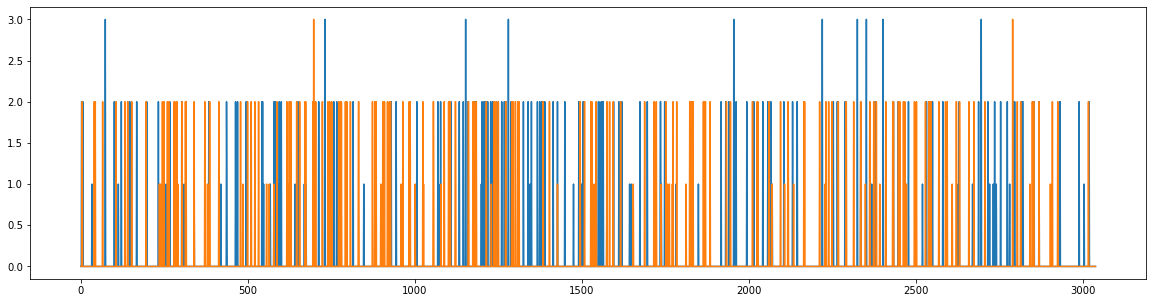

In [87]:
import matplotlib.pyplot as plt
resultado1 = pd.DataFrame(resultado)
y_test1 = pd.DataFrame(y_test)
plt.figure(figsize=(20,5))
plt.plot(resultado1.values)
plt.plot(y_test1.values)
plt.show()

In [56]:
categoria = ['Blue','Gold', 'Platinum', 'Silver']
categoria

['Blue', 'Gold', 'Platinum', 'Silver']

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado, target_names = categoria))

              precision    recall  f1-score   support

        Blue       0.93      0.94      0.94      2832
        Gold       0.00      0.00      0.00        34
    Platinum       0.03      0.02      0.03       171
      Silver       0.00      0.00      0.00         2

    accuracy                           0.88      3039
   macro avg       0.24      0.24      0.24      3039
weighted avg       0.87      0.88      0.87      3039



In [58]:
import pydot
import graphviz
from ipywidgets import interact

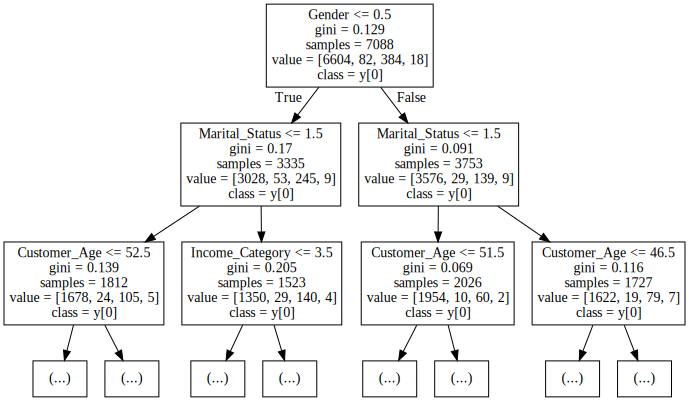

In [113]:
dot_data = tree.export_graphviz(clf, max_depth= 2, feature_names = df_x.columns, class_names =True)

graph = graphviz.Source(dot_data)
graph